In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
np.random.seed(42)

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option('display.max_rows', df.shape[0])
pd.set_option('display.max_columns', df.shape[1])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data cleaning (Check duplicates and null values)

In [3]:
df.TotalCharges.replace(' ', np.nan, inplace= True)

In [4]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df.TotalCharges.dropna(inplace= True)

In [6]:
df.TotalCharges = df.TotalCharges.astype(np.float64)

In [7]:
df.customerID.duplicated().sum()

0

In [8]:
# proportion churn given that multiple lines
df_multi = df[df.MultipleLines == 'Yes']
p_churn_given_multi = df_multi.query('Churn == "Yes"').shape[0]/df_multi.shape[0]
p_churn_given_multi

0.286098956580276

## Questions:
### 1- What are the variables that may affect customer churn?
### 2- Will the customer churn or not?

#### 1- What are the variables that may affect customer churn?

There's multiple ways to answer this question but we chose to answer it using the corr coeff R that indicates the strength of the corr!

In [9]:
# indicate correlations between variables (value of R)
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


- Unfortunately, There's no strong correlations!
- There's many categorical data!

In [10]:
# make copy of df to save
df_save = df.copy()
df_save.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# get dummy variables to all categorical data 
df['Male'] = pd.get_dummies(df.gender).Male
df['Partner'] = pd.get_dummies(df.Partner).Yes
df['Dependents'] = pd.get_dummies(df.Dependents).Yes
df['PhoneService'] = pd.get_dummies(df.PhoneService).Yes
df['MultipleLines'] = pd.get_dummies(df.MultipleLines).Yes
df[['DSLInternetService', 'FiberInternetSevice', 'NoInternetService']] = pd.get_dummies(df.InternetService)
df['OnlineSecurity'] = pd.get_dummies(df.OnlineSecurity).Yes
df['OnlineBackup'] = pd.get_dummies(df.OnlineBackup).Yes
df['DeviceProtection'] = pd.get_dummies(df.DeviceProtection).Yes
df['TechSupport'] = pd.get_dummies(df.TechSupport).Yes
df['StreamingTV'] = pd.get_dummies(df.StreamingTV).Yes
df['StreamingMovies'] = pd.get_dummies(df.StreamingMovies).Yes
df[['MonthContract', 'YearContract', 'TwoYearContract']] = pd.get_dummies(df.Contract)
df['PaperlessBilling'] = pd.get_dummies(df.PaperlessBilling).Yes
PaymentMethod_dummy = pd.get_dummies(df.PaymentMethod)
df['AutomaticPaymnet'] = PaymentMethod_dummy['Bank transfer (automatic)'] + PaymentMethod_dummy['Credit card (automatic)']
df['Churn'] = pd.get_dummies(df.Churn).Yes

In [12]:
df.drop(['gender', 'Contract', 'PaymentMethod', 'InternetService'], axis= 'columns', inplace= True)

In [13]:
pd.set_option('display.max_rows', df.shape[0])
pd.set_option('display.max_columns', df.shape[1])
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,DSLInternetService,FiberInternetSevice,NoInternetService,MonthContract,YearContract,TwoYearContract,AutomaticPaymnet
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,1,0,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,1,0,0,1,0,0,0
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,1,0,0,0,1,0,1
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,1,0,0,0


In [14]:
# indicate correlations between churn and othe variables (value of R)
df.corr().loc['Churn']

SeniorCitizen          0.150889
Partner               -0.150448
Dependents            -0.164221
tenure                -0.352229
PhoneService           0.011942
MultipleLines          0.040102
OnlineSecurity        -0.171226
OnlineBackup          -0.082255
DeviceProtection      -0.066160
TechSupport           -0.164674
StreamingTV            0.063228
StreamingMovies        0.061382
PaperlessBilling       0.191825
MonthlyCharges         0.193356
TotalCharges          -0.199484
Churn                  1.000000
Male                  -0.008612
DSLInternetService    -0.124214
FiberInternetSevice    0.308020
NoInternetService     -0.227890
MonthContract          0.405103
YearContract          -0.177820
TwoYearContract       -0.302253
AutomaticPaymnet      -0.209902
Name: Churn, dtype: float64

In [15]:
# Unfortunately there's no strong corrs appeared but there's some of them we can make use of it!
eff_df = df[['Churn', 'tenure', 'FiberInternetSevice', 'MonthContract', 'TwoYearContract']]       # variables that has R > 0.25
eff_df.head()

,Churn,tenure,FiberInternetSevice,MonthContract,TwoYearContract
0,0,1,0,1,0
1,0,34,0,0,0
2,1,2,0,1,0
3,0,45,0,0,0
4,1,2,1,1,0


### 2- Will the customer churn or not?
We can answer this question using 2 methods:
- The p-value calculation.
- logistic regression model that predicts will the customer churn or not!

### 1- The p-value calculation.
First we have to set the null/alternative hypothesis:
- Let,
    - **$C_{0}:$** be the proportion of non-churn customers.
    - **$C_{1}:$** be the proportion of churn customers.
- Assuming the average customer will churn by defualt, then the null/alternative hypothesis wll be:
    - **$H_{0}:$ $C_{0}$ <= $C_{1}$**
    - **$H_{1}:$ $C_{0}$ > $C_{1}$**

In [16]:
n_non_churn = eff_df[eff_df.Churn == 0].shape[0]
n_churn = eff_df[eff_df.Churn == 1].shape[0]

In [17]:
p_non_churn = eff_df[eff_df.Churn == 0].shape[0]/eff_df.shape[0]          #proportion of non-churn customers
p_churn = eff_df[eff_df.Churn == 1].shape[0]/eff_df.shape[0]              #proportion of churn customers

In [18]:
p_churn

0.2653698707936959

In [19]:
obs_diff = p_non_churn - p_churn
obs_diff

0.4692602584126082

In [20]:
non_churn_sampling_props = np.random.binomial(n_non_churn, p_non_churn, 10000)/n_non_churn
churn_sampling_props = np.random.binomial(n_churn, p_churn, 10000)/n_churn
diffs = non_churn_sampling_props - churn_sampling_props 

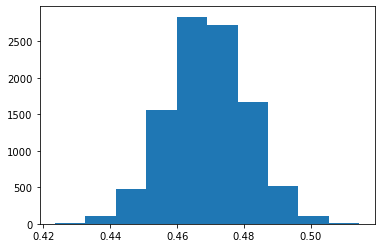

In [21]:
plt.hist(diffs);

In [22]:
null_vals = np.random.normal(0, np.std(diffs), 10000) # Here are 10000 draws from the sampling distribution under the null

In [23]:
p_value = (null_vals > obs_diff).mean()
p_value

0.0

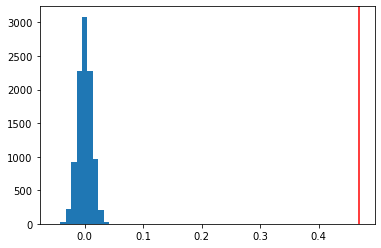

In [24]:
plt.hist(null_vals)
plt.axvline(x= obs_diff, c= 'r');

### Conclusion
- We have to reject the null hypothesis
- As the p-value is lower than level of signifcant (alpha value = 0.05)
- The p-value calculations suggests that the average customer is more likely to not churn.

### 2- Logistic regression model that predicts will the customer churn or not!

In [25]:
eff_df['intercept'] = 1
log_model = sm.Logit(eff_df['Churn'], eff_df[['intercept', 'tenure', 'FiberInternetSevice', 'MonthContract', 'TwoYearContract']])
res = log_model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


<ipython-input-25-85c21b627999>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eff_df['intercept'] = 1
C:\Users\Youssef Hussein\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Youssef Hussein\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Youssef Hussein\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Youssef Hussein\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning:

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                 Logit              Pseudo R-squared:   inf   
Dependent Variable:    Churn              AIC:                inf   
Date:                  2021-04-09 22:28   BIC:                inf   
No. Observations:      7043               Log-Likelihood:     -inf  
Df Model:              4                  LL-Null:            0.0000
Df Residuals:          7038               LLR p-value:        1.0000
Converged:             1.0000             Scale:              1.0000
No. Iterations:        8.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
intercept           -1.5694   0.1098 -14.2878 0.0000 -1.7847 -1.3541
tenure              -0.0290   0.0019 -15.1839 0.0000 -0.0327 -0.0252
FiberInternetSevice  1.4756   0.0682  21.6492 0.0000  1.3420  1.6092
MonthContract        0.9412   0.1008   9.3328 0.0000  0.7435  1.1388
TwoYearContract     -0.9428   0.1719  -5.4836 0.0000 -1.2798 -0.6058
====================================================================

"""

In [26]:
np.exp(res.params)

intercept              0.208174
tenure                 0.971458
FiberInternetSevice    4.373749
MonthContract          2.563014
TwoYearContract        0.389542
dtype: float64

In [27]:
1/np.exp(res.params)

intercept              4.803667
tenure                 1.029381
FiberInternetSevice    0.228637
MonthContract          0.390166
TwoYearContract        2.567116
dtype: float64

### Conclusion:
- For each unit decrease in tenure, churn is 1.029381 more likely to happen, holding all other varible constant.
- For each unit increase in FiberInternetSevice, churn is 1.041599 more to happen, holding all other varible constant.
- For every unit for UK increases, churn is 1.009932 more to happen, holding all other varible constant.


- We have to reject the null hypothesis.
- As this all the coefficients of the model has a small p-value (smaller than level of significant (alpha value = 0.05)).
- This model suggests that the average customer is more likely to not churn.